### Load  the data

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('business.retailsales.csv')
df.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [34]:
df.shape


(1775, 6)

In [36]:
df.describe()

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,3.712676,199.671746,-6.317623,-5.385437,187.968687
std,6.243078,464.880638,20.903517,46.654269,414.547039
min,-1.000000,0.000000,-594.000000,-1609.000000,-106.250000
25%,1.000000,48.000000,-6.000000,0.000000,44.800000
50%,2.000000,100.000000,0.000000,0.000000,96.000000
75%,4.000000,185.500000,0.000000,0.000000,184.750000
max,96.000000,14935.000000,0.000000,0.000000,12732.000000


In [38]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


In [40]:
df.isnull().sum()

Product Type       8
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

In [42]:
df.duplicated().sum()

512

### Data cleaning

In [45]:
# 1. Remove exact duplicate rows
df = df.drop_duplicates()

# 2. Aggregate by Product Type (if that makes sense for your analysis)
agg_cols = ['Net Quantity', 'Gross Sales', 'Discounts', 'Returns', 'Total Net Sales']

df_agg = (
    df.groupby('Product Type', as_index=False)[agg_cols]
      .sum()
)

df_agg.to_csv('retailsales_deduped_aggregated.csv', index=False)
print(df_agg.head())

      Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
0      Accessories            71       2946.4     -95.62     0.00   
1  Art & Sculpture          1315      84924.6   -2938.72 -2879.93   
2           Basket          1152     110256.5   -3740.52 -4439.69   
3        Christmas           565      15296.0    -345.19  -670.00   
4           Easter             1         38.0      -3.80     0.00   

   Total Net Sales  
0          2850.78  
1         79105.95  
2        102076.29  
3         14280.81  
4            34.20  


In [47]:
df.duplicated().sum()

0

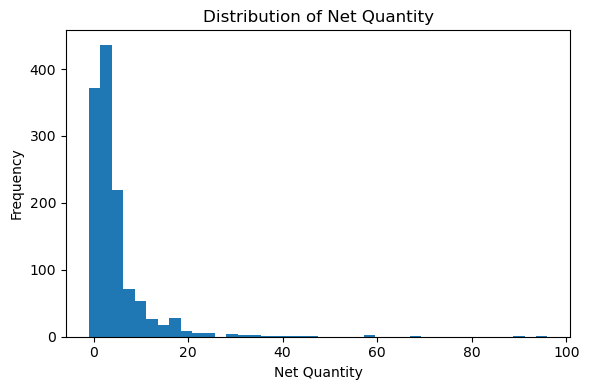

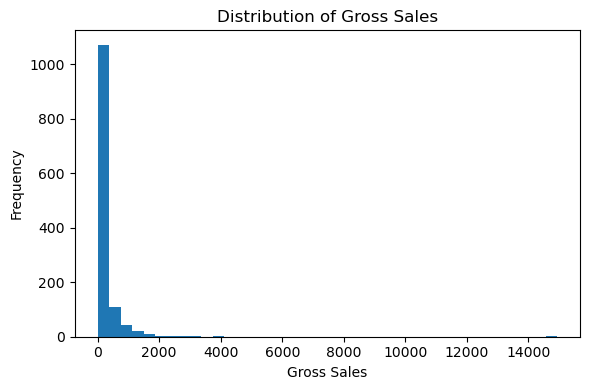

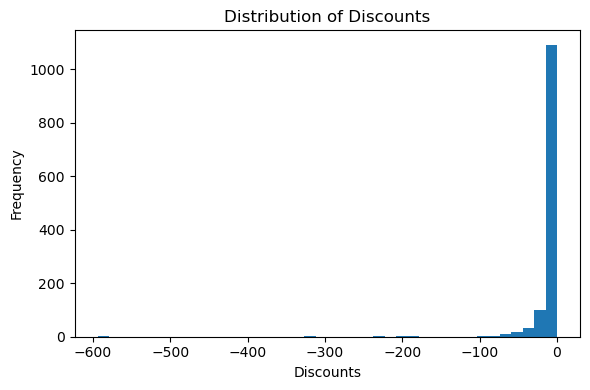

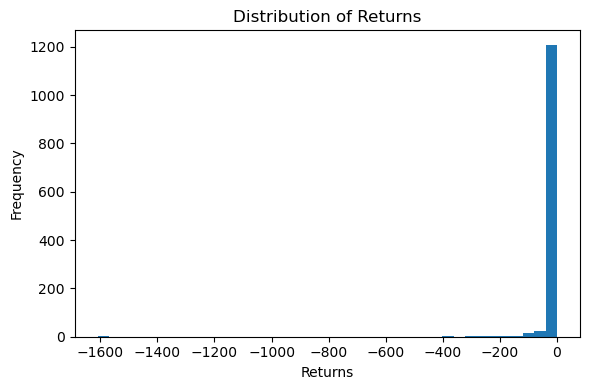

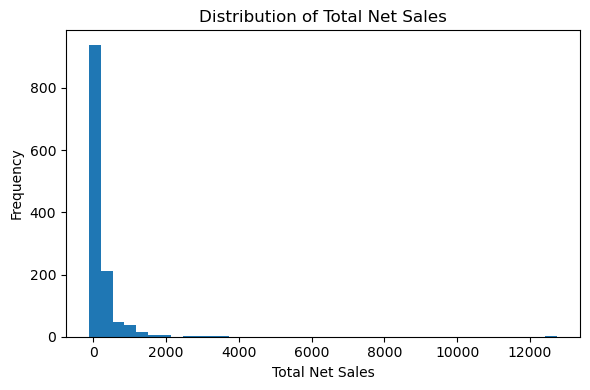

In [50]:
numeric_cols = ["Net Quantity", "Gross Sales", "Discounts", "Returns", "Total Net Sales"]

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=40)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

### SALES BY PRODUCT TYPE

Total Net Sales by Product Type:


Product Type
Basket              102076.29
Art & Sculpture      79105.95
Jewelry              26360.35
Home Decor           24568.19
Christmas            14280.81
Kitchen              13721.62
Soapstone             4413.09
Recycled Art          3489.16
Kids                  3205.04
Accessories           2850.78
Skin Care             2553.30
Music                 2338.70
Fair Trade Gifts      2180.67
Furniture             1864.96
Textiles              1610.70
One-of-a-Kind         1448.01
Easter                  34.20
Gift Baskets            19.50
Name: Total Net Sales, dtype: float64

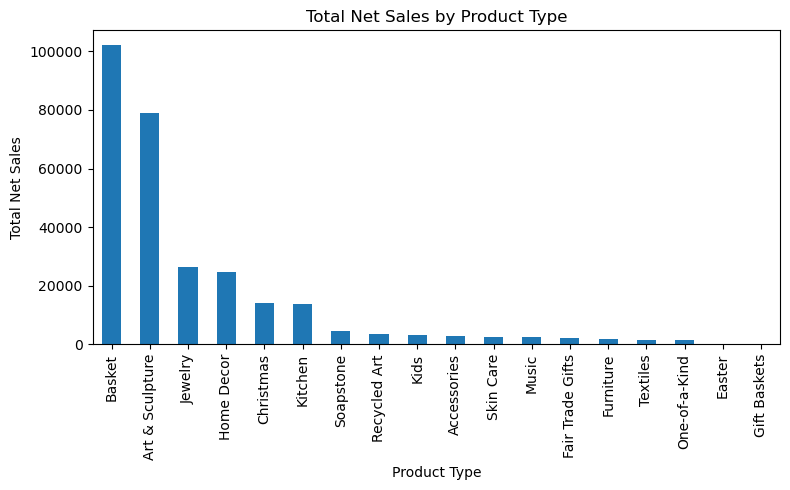

In [52]:
sales_by_product = df.groupby("Product Type")["Total Net Sales"].sum().sort_values(ascending=False)

print("Total Net Sales by Product Type:")
display(sales_by_product)

plt.figure(figsize=(8, 5))
sales_by_product.plot(kind="bar")
plt.title("Total Net Sales by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Total Net Sales")
plt.tight_layout()
plt.show()

In [55]:

agg_product = df.groupby("Product Type").agg(
    avg_net_qty=("Net Quantity", "mean"),
    avg_gross_sales=("Gross Sales", "mean"),
    avg_discount=("Discounts", "mean"),
    avg_returns=("Returns", "mean"),
    avg_net_sales=("Total Net Sales", "mean")
).sort_values(by="avg_net_sales", ascending=False)

print("Aggregated metrics per Product Type:")
display(agg_product)

Aggregated metrics per Product Type:


,avg_net_qty,avg_gross_sales,avg_discount,avg_returns,avg_net_sales
Product Type,,,,,
Basket,3.801980,363.882838,-12.344950,-14.652442,336.885446
Art & Sculpture,5.136719,331.736719,-11.479375,-11.249727,309.007617
Skin Care,10.000000,259.100000,-3.770000,0.000000,255.330000
Christmas,8.560606,231.757576,-5.230152,-10.151515,216.375909
Home Decor,3.321739,225.491739,-8.174000,-3.681304,213.636435
Jewelry,6.230769,194.475524,-6.576573,-3.560839,184.338112
One-of-a-Kind,1.000000,190.000000,-8.998750,0.000000,181.001250
Recycled Art,4.571429,169.847619,-3.697143,0.000000,166.150476
Textiles,3.153846,139.461538,-8.100000,-7.461538,123.900000
